In [ ]:
import numpy as np
from saclarun import saclarun
%matplotlib widget
import matplotlib.pyplot as plt


In [ ]:
run=saclarun('/work/gorkhover/H5/TAIS2019/782510.h5')

In [80]:
def gethist(images,gain,**args):
    for img in images:
        val,edge=np.histogram(img,**args)
        yield val
        

In [ ]:
(20000+2000)/50

In [ ]:
for i in range(1000,5000,500):
    x=np.linspace(0,20000,201)+50
    hist=(sum(gethist(run.detector_2d_3[i:i+100],gain=run.detector_2d_3.absolute_gain,range=[0,20000],bins=201)))
    plt.plot(x,hist)
    centers,_=ss.find_peaks((hist),distance=20,prominence=5,width=2)
    print(centers)
    centers=np.array(centers)*50
    centers=np.array([6400,2*6400])
#     centers=[6400]
    models=[]
    params=[]
    #gaussian peaks
#     models=[lmfit.models.GaussianModel(prefix=f'p{i}_') for i in range(len(centers))]
#     for i in range(len(centers)): models[i].set_param_hint(f'center', value=centers[i],min=centers[i]-250,max=centers[i]+250)
#     for i in range(len(centers)): models[i].set_param_hint(f'amplitude', value=1e6,min=0,max=1e8)
#     params=[m.make_params(sigma=300) for i,m in enumerate(models)]

#     models.append(lmfit.models.ExpressionModel('off + amp * exp(-(x-x0)/d)+c*x'))            

#     params.append(models[-1].make_params(off=5000,amp=1e6,x0=800,d=150,c=-0.0001))



#     models.append(lmfit.models.PolynomialModel(6))                 

#     params.append(models[-1].make_params(c0=0,c1=-1,c2=1,c3=0,c4=0,c5=0,c6=0))
    #noise peak
    models.append(lmfit.models.VoigtModel(prefix=f'pb1_'))
    models[-1].set_param_hint(f'center', value=1000)
    models[-1].set_param_hint(f'sigma', value=100,min=0,max=1000)
    models[-1].set_param_hint(f'gamma', value=10,min=0,max=100)
    params.append(models[-1].make_params(amplitude=2e9))
    
#     models.append(lmfit.models.VoigtModel(prefix=f'pb2_'))
#     models[-1].set_param_hint(f'center', value=0,min=-200,max=0)
#     models[-1].set_param_hint(f'sigma', value=300,min=0,max=1000)
#     models[-1].set_param_hint(f'gamma', value=10,min=0,max=100)
#     params.append(models[-1].make_params(amplitude=1e9))
    
    
    #linear background
#     models.append(lmfit.models.LinearModel(prefix="l_"))
#     models[-1].set_param_hint(f'slope', value=0,min=-0.1,max=0.1)
#     models[-1].set_param_hint(f'intercept', value=0,min=-500,max=500)
#     params.append(models[-1].make_params()) 
    
    #combine

    model = reduce((lambda x, y: x + y), models)
    param=params[0]
    for p in params[1:]: param.update(p)

#     plt.plot(centers,[1]*len(centers),marker='x',linestyle='None')
#     plt.show()
#     hist=np.hstack((np.flip(hist),hist))
#     x=np.hstack((np.flip(-x),x))
    w=np.ones(200)
    low=10
    g1=40
    g2=100
    high=130
    w[:low]=0
    w[g1:g2]=0
    w[high:]=0
    output = model.fit(hist[:200], param, x=x[:200],weights=w)
    output.plot()
    plt.plot(x[low:high],x[low:high]*0+1e4)
    plt.plot(x[g1:g2],x[g1:g2]*0+2e4)
    plt.xlim(x[low]-1000,20000)
    plt.ylim(-1e3,5e4)
#     break
    plt.show()
    
    params=output.params
    for key in params.keys(): 
        params[key].vary=False
    centers=[6000]
    modelsp=([lmfit.models.GaussianModel(prefix=f'p{i}_') for i in range(len(centers))])
    for i in range(len(centers)): modelsp[i].set_param_hint(f'p{i}_center', value=centers[i],min=centers[i]-250,max=centers[i]+250)
    for i in range(len(centers)): modelsp[i].set_param_hint(f'p{i}_amplitude', value=1e5,min=0,max=1e8)
    for i in range(len(centers)): modelsp[i].set_param_hint(f'p{i}_sigma', value=100,min=0,max=500)

    for i,m in enumerate(modelsp):
        params.update(m.make_params(sigma=50) )
    model = model+reduce((lambda x, y: x + y), modelsp)
    w=np.ones_like(x)
    w[:g1]=0
    output = model.fit(hist, params, x=x,weights=w)
    output.plot()
    plt.xlim(x[low]-1000,20000)
    plt.ylim(-1e3,5e4)
    break

In [ ]:
output

In [ ]:
1697673.79/1e6

In [ ]:
12699.9944/2,6218.98348

In [ ]:
#create model

#find peaks
centers,_=ss.find_peaks(hist,distance=50,prominence=20)
print(centers)
print(np.array(centers)*50+1025)


In [ ]:
for p in params: 
    p.

In [ ]:
p=p['pb1_sigma']

In [ ]:
p.vary=False

In [ ]:
params

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt


In [3]:
plt.plot(range(10))
plt.show()

FigureCanvasNbAgg()

In [74]:
import numpy as np
from saclarun import saclarun
%matplotlib inline
import matplotlib.pyplot as plt
run=saclarun('/work/gorkhover/H5/TAIS2019/782510.h5')

In [86]:

# fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.ion()

# fig.show()
# fig.canvas.draw()

count=0
accum=0

for img in run.detector_2d_3:
    dat=np.array(img)[0,...]*run.detector_2d_3.absolute_gain*3.65
    seed=dat>2000
    empty=ss.convolve(seed,np.ones((5,5)),mode='same')<0.9
    count+=empty
    accum+=dat*empty
bg=accum/count

#     ax.matshow(np.squeeze(np.array(img))[:50,:50],vmin=0,vmax=100)
#     fig.canvas.draw()

In [93]:
count=0
accum=0
for img in run.detector_2d_3:
    dat=np.array(img)[0,...]*run.detector_2d_3.absolute_gain*3.65-bg
    seed=dat>2000
    count+=seed
    accum+=seed*dat
mean=accum/count
gain=1/(mean/np.nanmean(mean))
#     ax.clear()

/home/gorkhover/anaconda3/envs/zimmf/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/home/gorkhover/anaconda3/envs/zimmf/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [57]:
bg=accum/count

In [70]:
plt.matshow(bg)
plt.colorbar()
plt.close()

/home/gorkhover/anaconda3/envs/zimmf/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

6140.0
6060.0
6140.0

6220.0
6140.0
6100.0

6380.0
6100.0
6100.0

6220.0
6140.0
6100.0

6300.0
6180.0
6060.0

6100.0
6140.0
6100.0

6420.0
6020.0
6140.0

6420.0
6020.0
6180.0



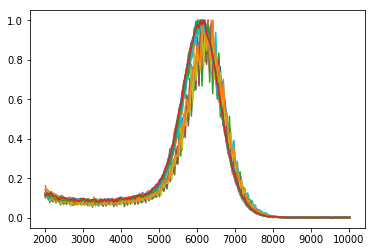

In [140]:

for i in range(1000,5000,500):
    x=np.linspace(2000,10000,201)+20
    dat=np.array(run.detector_2d_3[i:i+20])*run.detector_2d_3.absolute_gain*3.65
    
    hist=(sum(gethist(dat,gain=1,range=[2000,10000],bins=201)))
    hist=hist/np.max(hist)
    print(x[np.argmax(hist)])
    plt.plot(x,hist)
    histbg=(sum(gethist(dat-bg,gain=1,range=[2000,10000],bins=201)))
    histbg=histbg/np.max(histbg)
    print(x[np.argmax(histbg)])
    plt.plot(x,histbg)
    #[:,600:800,:200]
    histgain=(sum(gethist(((dat-bg)*gain),gain=1,range=[2000,10000],bins=201)))
    histgain=histgain/np.max(histgain)
    plt.plot(x,histgain)
    print(x[np.argmax(histgain)])
    print()
#     plt.show()

In [136]:
len(x)

201

In [42]:
seed=dat>3500

In [43]:
import scipy.signal as ss

In [46]:
empy=ss.convolve(seed,np.ones((3,3)))<0.9

In [40]:
ss.convolve(seed,np.ones((3,3)))

array([[ 3.22530068e-17,  5.44230419e-18, -6.83389433e-17, ...,
        -5.54466598e-17, -8.33333629e-17, -9.08904678e-18],
       [-3.11607735e-17, -1.02588693e-16, -1.27730456e-16, ...,
         1.77001516e-16,  7.32614202e-17,  1.26150322e-16],
       [-4.91183740e-17,  4.46801887e-17, -2.53440409e-18, ...,
         2.68875840e-18,  6.99764957e-19,  2.99252445e-17],
       ...,
       [ 1.48029737e-16,  2.83723662e-16,  1.04858874e-16, ...,
         1.00000000e+00,  4.61086268e-17, -6.82145562e-17],
       [ 5.75671198e-17,  1.11022302e-16,  4.98242294e-18, ...,
         1.00000000e+00, -1.92642732e-16, -2.47958895e-16],
       [ 7.81268054e-17, -1.85037171e-17,  8.39759482e-17, ...,
         6.52983575e-17, -3.97223572e-17,  1.11529782e-16]])

In [73]:
plt.plot(x,histbg)


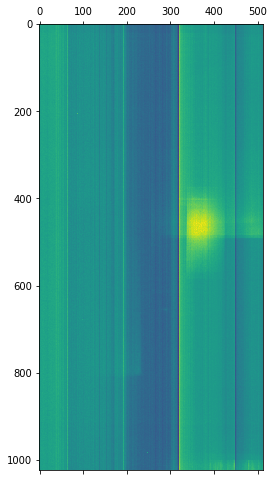

In [87]:
plt.matshow(bg)

(0.9, 1.1)

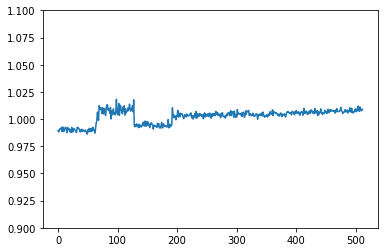

In [118]:
gain=1/(mean/np.nanmean(mean))
plt.plot(np.nanmean(gain,axis=0))
plt.ylim((0.9,1.1))

In [105]:
((dat-bg)*gain)[0,100:300,100:300]

array([[  111.77718212,  1356.7503374 ,  -254.2238708 , ...,
          180.25042422,  -336.79295891,  -384.4293515 ],
       [  689.58022042,  -337.64220157,  -538.18969938, ...,
          -88.83456242,  -529.69364021,  -481.32718537],
       [  389.00783591, -1218.2218249 ,   864.57696071, ...,
          568.27023957,   216.49281795,   478.51568599],
       ...,
       [ -754.05893709,   144.60795727,  -373.22243755, ...,
         -189.04834492,  -282.72653181,  -226.82938365],
       [ 1214.56925789,   116.47203009,   849.29484256, ...,
          152.28356092,   961.80402001,  -233.61308905],
       [  -72.64951767,  -340.45889428,   297.43132475, ...,
          472.06268116,  -942.76391415,   159.77447466]])

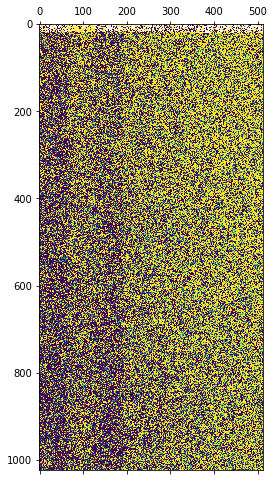

In [122]:
plt.matshow(gain,vmin=0.99,vmax=1.01)

In [147]:
dat=np.array(img)[0,...]*run.detector_2d_3.absolute_gain*3.65
seed=dat>6000
dat2=dat-6000*seed
seed2=dat2>6000
dat3=dat2-6000*seed2

seed3=dat3>6000
dat4=dat3-6000*seed3

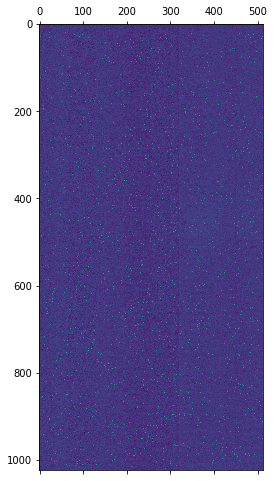

In [142]:
plt.matshow(dat2)

4207

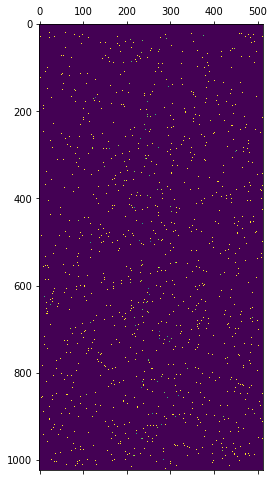

In [163]:
t=(dat4>3000)*ss.convolve(dat4,np.ones((3,3)),mode='same')
plt.matshow(t,vmin=0,vmax=5000)
np.sum(t>6000)

In [150]:
np.sum(dat4>3000)

6070

In [151]:
np.sum(seed)

8211

In [152]:
np.sum(seed2)

110

12484


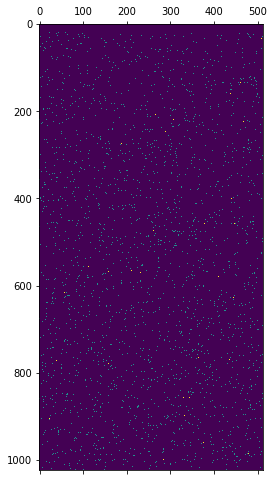

In [227]:
neu=seed.astype(int)+seed2.astype(int)+seed3.astype(int)+(dat4>5000).astype(int)
plt.matshow(neu,vmax=2)
print(np.sum(neu))

In [229]:
np.sum(dat[dat>1000]/6400)

16264.117

In [230]:
np.sum(neu)

12484

In [175]:
seed3.flatten()[214531]

True

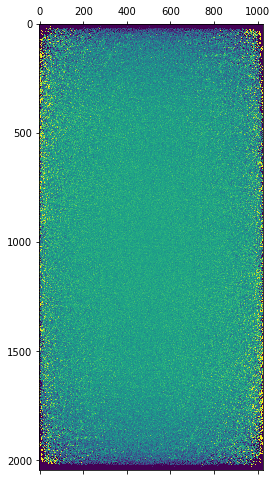

In [231]:
conv=ss.correlate(neu,neu,method='fft',mode='full')
norm=ss.correlate(np.ones_like(neu),np.ones_like(neu),method='fft',mode='full')
plt.matshow(conv/norm,vmax=0.001)

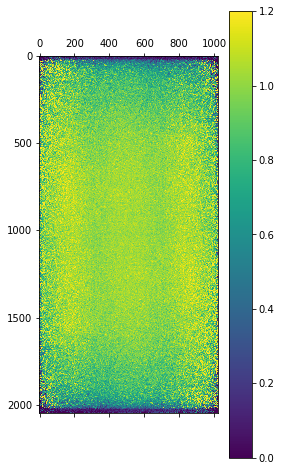

In [263]:
t=(dat*(dat>1000))/6400
t=t/np.sum(t)
conv=ss.correlate(t,t,method='fft',mode='full')
norm=ss.correlate(np.ones_like(t),np.ones_like(t),method='fft',mode='full')
norm=norm/np.sum(norm)
plt.matshow(conv/norm,vmin=0,vmax=1.2)
plt.colorbar()

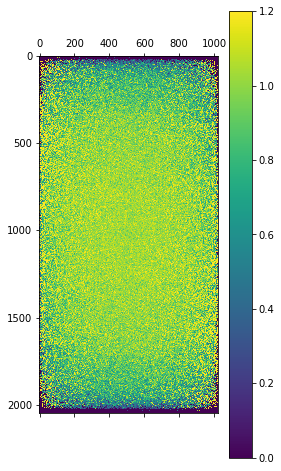

In [264]:
t=neu
t=t/np.sum(t)
conv=ss.correlate(t,t,method='fft',mode='full')
norm=ss.correlate(np.ones_like(t),np.ones_like(t),method='fft',mode='full')
norm=norm/np.sum(norm)
plt.matshow(conv/norm,vmin=0,vmax=1.2)
plt.colorbar()

In [196]:
np.sum(t>6000)

4207

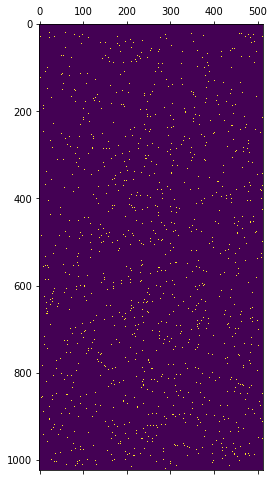

In [198]:
plt.matshow(dat3>3000)

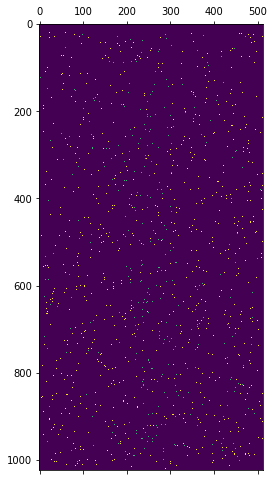

In [210]:
plt.matshow(1*(t>6000)+2*(dat4>3000))

In [203]:
import scipy.ndimage as ndi

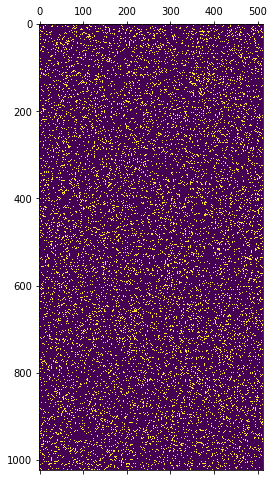

In [216]:
lmax=ndi.maximum_filter(dat4,3)==dat4
plt.matshow(lmax)

(array([6.0000e+00, 1.6000e+01, 4.1000e+01, 1.6000e+02, 2.8200e+02,
        8.6900e+02, 2.4750e+03, 5.8150e+03, 8.8150e+03, 1.8394e+04,
        3.2297e+04, 5.0644e+04, 5.9662e+04, 7.0061e+04, 7.6966e+04,
        6.6322e+04, 5.0511e+04, 3.1849e+04, 2.1829e+04, 1.1041e+04,
        5.3680e+03, 1.6910e+03, 1.1460e+03, 5.2900e+02, 3.0700e+02,
        1.8900e+02, 2.1100e+02, 1.7100e+02, 1.6200e+02, 1.4900e+02,
        1.5100e+02, 1.3200e+02, 1.1800e+02, 1.4700e+02, 1.5200e+02,
        1.3500e+02, 1.3300e+02, 1.4100e+02, 1.3900e+02, 1.6300e+02,
        1.5000e+02, 1.8500e+02, 1.7800e+02, 2.2400e+02, 2.3800e+02,
        3.3900e+02, 5.0100e+02, 7.2500e+02, 9.6500e+02, 1.3940e+03]),
 array([-2177.70263672, -2014.57864258, -1851.45464844, -1688.3306543 ,
        -1525.20666016, -1362.08266602, -1198.95867187, -1035.83467773,
         -872.71068359,  -709.58668945,  -546.46269531,  -383.33870117,
         -220.21470703,   -57.09071289,   106.03328125,   269.15727539,
          432.28126953,   595.

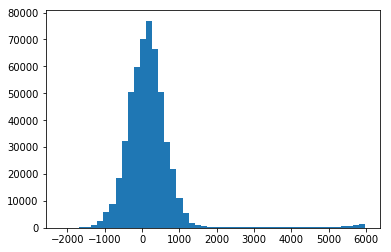

In [225]:
plt.hist(dat4.flatten(),bins=50)